In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
print(os.getcwd())
root = '/project/wyin/jlee/ml-project'
data_loc = path.join(root, 'inverse-shifted/data')

/project/wyin/jlee/ml-project/inverse-shifted/data-analysis


In [7]:
train_set = np.load(path.join(data_loc, "train-set.npz"))
print(train_set['dos'].shape)

val_set = np.load(path.join(data_loc, "val-set.npz"))
print(val_set['dos'].shape)

test_set = np.load(path.join(data_loc, "test-set.npz"))
print(test_set['dos'].shape)

print(test_set['params'][0])

(25534, 354)
(3103, 354)
(3238, 354)
[-0.06   0.24   0.376]


In [8]:
all_dos = np.zeros((25, 25, 51, 354))

def load_dos(dataset):
    params_arr = dataset['params']
    dos_arr = dataset['dos']
    
    for i, params in enumerate(params_arr):
        t1_ind = round((params[0] + 0.5) * 50)
        t2_ind = round((params[1] - 0.02) * 50)
        j_ind = round((params[2] - 0.2) * 62.5)
        
        all_dos[t1_ind, t2_ind, j_ind] = dos_arr[i]
        
        if (i % 10000) == 0:
            print(i)

In [9]:
load_dos(train_set)

0
10000
20000


In [10]:
load_dos(val_set)
load_dos(test_set)

0
0


6
6
6
6


Text(0.5, 1.0, 't2 = 0.2, J = 0.296')

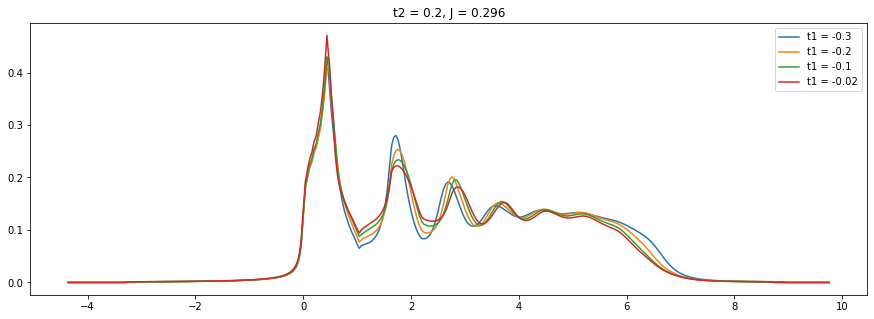

In [31]:
def plot_dos(t1, t2, j, ax):
    
    t1_ind = round((t1 + 0.5) * 50)
    t2_ind = round((t2 - 0.02) * 50)
    j_ind = round((j - 0.2) * 62.5)
    print(j_ind)
    
    ax.plot(np.linspace(-4.36, 9.76, 354), all_dos[t1_ind, t2_ind, j_ind], label = f"t1 = {t1}")

fig, ax = plt.subplots(figsize = (15, 5))
plot_dos(-0.3, 0.2, 0.296, ax)
plot_dos(-0.2, 0.2, 0.296, ax)
plot_dos(-0.1, 0.2, 0.296, ax)
plot_dos(-0.02, 0.2, 0.296, ax)
ax.legend()
ax.set_title("t2 = 0.2, J = 0.296")